This notebook introduces the ForestLAS package developed to analyse LiDAR data in a (mostly!*) purely Python workflow. Firstly we will run through some basic functioanlity of ForestLAS, importing and exporting .las files, then look at creating canopy height profiles at the plot scale before finally applying this to a larger area.
* requires lastools if using compressed .laz files

In [2]:
# required for demonstration
import os, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temporary directory at: /var/folders/jv/4d6qbpmn2ns10dfh6dmw9xk40000gp/T/lidar.processing.6706214.tmp
number of tiles to process: 1
0.0% | 0 of 4916 points processed | 2019-12-16 09:57:18.550683
5.0% | 245 of 4916 points processed | 2019-12-16 09:57:18.579170
10.0% | 490 of 4916 points processed | 2019-12-16 09:57:18.607674
15.0% | 735 of 4916 points processed | 2019-12-16 09:57:18.635711
20.0% | 980 of 4916 points processed | 2019-12-16 09:57:18.663365
25.0% | 1225 of 4916 points processed | 2019-12-16 09:57:18.690828
30.0% | 1470 of 4916 points processed | 2019-12-16 09:57:18.718387
35.0% | 1715 of 4916 points processed | 2019-12-16 09:57:18.745882
40.0% | 1960 of 4916 points processed | 2019-12-16 09:57:18.775200
45.0% | 2205 of 4916 points processed | 2019-12-16 09:57:18.803658
50.0% | 2450 of 4916 points processed | 2019-12-16 09:57:18.831445
55.0% | 2695 of 4916 points processed | 2019-12-16 09:57:18.859033
60.0% | 2940 of 4916 points processed | 2019-12-16 09:57:18.886398
65.0% 

Text(0.5,0,'number of returns')

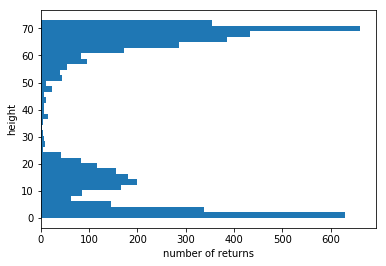

In [3]:
# import lasIO from ForestLAS
from forestlas import lasIO

# reads .las file "WC1.las" including all point metadata in verbose mode
las = lasIO.lasIO(os.path.join(os.getcwd(), 'WC1.las'), keepTemp=True,
                  verbose=True)

# returns as an numpy array
lasAll = las.all().asArray()

# plot histogram of height
plt.hist(lasAll['z'], 
         (lasAll['z'].max() / 2).astype(int), 
         orientation="horizontal")
plt.ylabel("height")
plt.xlabel("number of returns")

number of plots: 16
0.0% | 0 of 4916 points selected | 2019-12-16 09:57:20.804749
5.0% | 245 of 4916 points selected | 2019-12-16 09:57:20.849739
10.0% | 490 of 4916 points selected | 2019-12-16 09:57:20.894897
15.0% | 735 of 4916 points selected | 2019-12-16 09:57:20.944510
20.0% | 980 of 4916 points selected | 2019-12-16 09:57:21.000418
25.0% | 1225 of 4916 points selected | 2019-12-16 09:57:21.051736
30.0% | 1470 of 4916 points selected | 2019-12-16 09:57:21.102449
35.0% | 1715 of 4916 points selected | 2019-12-16 09:57:21.155340
40.0% | 1960 of 4916 points selected | 2019-12-16 09:57:21.202811
45.0% | 2205 of 4916 points selected | 2019-12-16 09:57:21.248379
50.0% | 2450 of 4916 points selected | 2019-12-16 09:57:21.293820
55.0% | 2695 of 4916 points selected | 2019-12-16 09:57:21.335957
60.0% | 2940 of 4916 points selected | 2019-12-16 09:57:21.377070
65.0% | 3185 of 4916 points selected | 2019-12-16 09:57:21.417933
70.0% | 3430 of 4916 points selected | 2019-12-16 09:57:21.459192

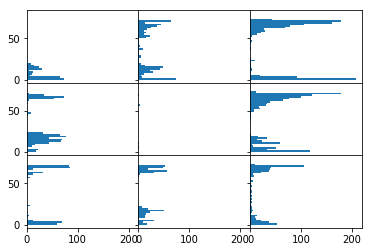

In [4]:
# data can also be tiled
# here we tile a plot into 9 subplots...
lasTiles = las.tiling(8).asArray()

# ...and plot histograms of height
f, a = plt.subplots(3, 3, sharex=True, sharey=True)
for i, tile in enumerate(lasTiles): 
    ax = a[i//3][i%3]
    ax.hist(tile['z'], bins=40, range=(0, 80), orientation="horizontal")
f.subplots_adjust(hspace=0, wspace=0)

0.0% | 0 of 4916 points processed | 2019-12-16 09:57:23.459011
1.0% | 27 of 4916 points processed | 2019-12-16 09:57:23.464607
1.0% | 27 of 4916 points processed | 2019-12-16 09:57:23.466058
1.0% | 31 of 4916 points processed | 2019-12-16 09:57:23.468161
1.0% | 36 of 4916 points processed | 2019-12-16 09:57:23.471046
1.0% | 53 of 4916 points processed | 2019-12-16 09:57:23.475325
1.0% | 61 of 4916 points processed | 2019-12-16 09:57:23.478267
2.0% | 74 of 4916 points processed | 2019-12-16 09:57:23.482289
2.0% | 78 of 4916 points processed | 2019-12-16 09:57:23.484474
2.0% | 79 of 4916 points processed | 2019-12-16 09:57:23.486398
2.0% | 81 of 4916 points processed | 2019-12-16 09:57:23.488200
2.0% | 81 of 4916 points processed | 2019-12-16 09:57:23.489947
2.0% | 82 of 4916 points processed | 2019-12-16 09:57:23.491790
2.0% | 90 of 4916 points processed | 2019-12-16 09:57:23.494201
2.0% | 104 of 4916 points processed | 2019-12-16 09:57:23.497470
2.0% | 108 of 4916 points processed | 20

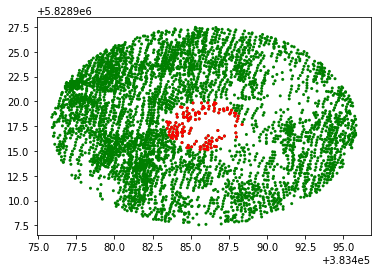

In [5]:
# data can also be extracted as a subplot
# first extract the plot centre coordinates
header = lasIO.parseHeader(os.path.join(os.getcwd(), 'WC1.las'))
x = np.mean([header["xmin"], header["xmax"]])
y = np.mean([header["ymin"], header["ymax"]])

# then extract returns from a 5 m diameter from the plot centre
# lasSubPlot = las.plot(x, y, radius=5, round=True).asArray()

lasSubPlot = las.plot(x, y, extent=5, round=True).asArray()

# and graph the complete plot and the subset
plt.scatter(lasAll['x'], lasAll['y'], marker=".",
            c="green", edgecolor="none")
plt.scatter(lasSubPlot['x'], lasSubPlot['y'], marker=".", 
            c="red", edgecolor="none")

In [6]:
# las files can be manipulated and then saved out
lasFirst = lasAll[lasAll['rtn_num'] == 1]
las.np2LAS(lasFirst, out=os.path.join(os.getcwd(), 'firstReturns.las'))

# check that
print lasIO.parseHeader(os.path.join(os.getcwd(), 'WC1.las'))["numptbyreturn"]
print lasIO.parseHeader(os.path.join(os.getcwd(), 'firstReturns.las'))["numptbyreturn"]

.las file written to /Users/phil/python/forestlas/firstReturns.las
(2568, 1670, 578, 92, 7)
(2568, 0, 0, 0, 0)


In [7]:
# finally there is an option to remove all temporary files and directories,
# this can be set as an option using lasIO.lasIO(keepTemp=False)
http://localhost:8888/notebooks/forestlas_intro.ipynb#las.removeTemp()

SyntaxError: invalid syntax (<ipython-input-7-c93a4d0a5aba>, line 3)

## Lets now create a canopy height profile

In [8]:
from forestlas import canopyComplexity as cc

self.bins: 8012


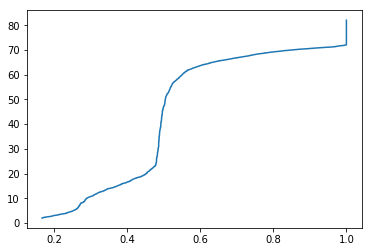

In [9]:
# canopy height profiles are created from gap probability
# canopyComplexity calls lasIO so there is no need to bring in .las files beforehand

las = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), 'WC1.las'))
pg = las.Pgap()

# lets take a look for our plot
plt.plot(pg.pgap, pg.zxOrig)

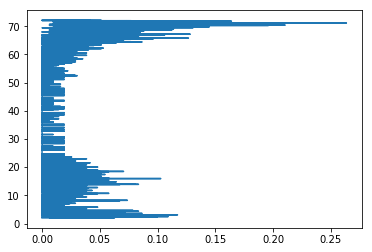

In [11]:
%autoreload 2
# if we plot the first derivative of this we see the CHP is 
# pretty noisy! Alpha is set to 0 so there is no smoothing
# applied
chp = las.CHP(alpha=0)
plt.plot(chp.fd, chp.zx)

self.bins: 8012
72.11


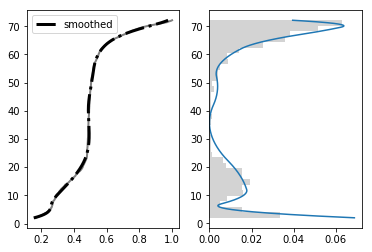

In [27]:
# through a supervised classification and cross validation an alpha
# parameter of 0.3 was identified as a suboptimal value for the 
# nonparametric spline smoothing (this is the default)

chp = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), 'WC1.las')).CHP()

# freq = cc.CanopyComplexity().fromLAS(os.path.join(lasFiles, "WC6.las"))
# freq = freq.canopyHeightProfile(frequency=True)

plt.subplot(121)
plt.plot(chp.pgap, chp.zx, "-", color="grey", linewidth=2)
plt.plot(chp.ps, chp.zx, "-.", color="black", linewidth=3, label="smoothed")
plt.legend(loc=2)

plt.subplot(122)
plt.plot(chp.fd, chp.zx)
#plt.plot(freq.fd, freq.zx, "r")
h, b = np.histogram(chp.z, (chp.z.max() / 2).astype(int), normed=True)
plt.barh(b[1:] - 1, h * (1 - chp.pgap.min()), height=2, fc="lightgrey")
print chp.z.max()

In [78]:
chp.z

array([ 6.41, 62.17, 65.12, ...,  7.05,  6.78,  3.11])

Number of canopy layers: 3


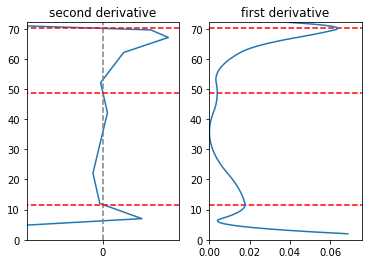

In [31]:
# from smmothed estimate of Pgap we can then take the second
# derivative to estimate the number of canopy layers

plt.subplot(121)
plt.plot(chp.sd, chp.zx)
plt.xlim(-0.01, 0.01)
plt.plot([0, 0], [0, 80], "--", color="grey")
for layer in chp.layerLocation:
    plt.plot([-1, 1], [layer, layer], "--r",)
plt.xticks([0])
plt.title("second derivative")
plt.ylim(0, chp.z.max())

plt.subplot(122)
for layer in chp.layerLocation:
    plt.plot([0, 1], [layer, layer], "--r",)
plt.plot(chp.fd, chp.zx)
plt.xlim(0, chp.fd.max() * 1.1)
plt.title("first derivative")
plt.ylim(0, chp.z.max())

print "Number of canopy layers:", chp.layerCount

Text(0,0.5,'probsbility')

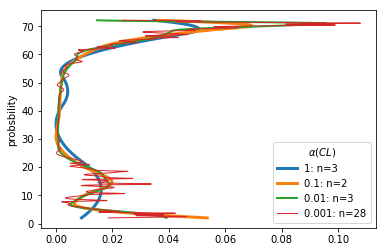

In [33]:
# 3 canopy layers may be considered an overestimtion of CL,
# one solution is to change the alpha paramter in the 
# las.canopyHeightProfile(alpha=x) call

for i, (alpha, lw) in enumerate(zip([1, 0.1, 0.01, 0.001],
                                    [3, 3, 2, 1])):
    chp = las.CHP(alpha=alpha)
    plt.plot(chp.fd, chp.zx, linewidth=lw, 
             label="{}: n={}".format(alpha, chp.layerCount),
             zorder=i)
    
plt.legend(loc="best", title=r"$\alpha (CL)$")
plt.ylabel("height (m)")
plt.ylabel("probsbility")

Text(0.12,0,'N.B. local maxima which are <5% of the largest peak are not counted')

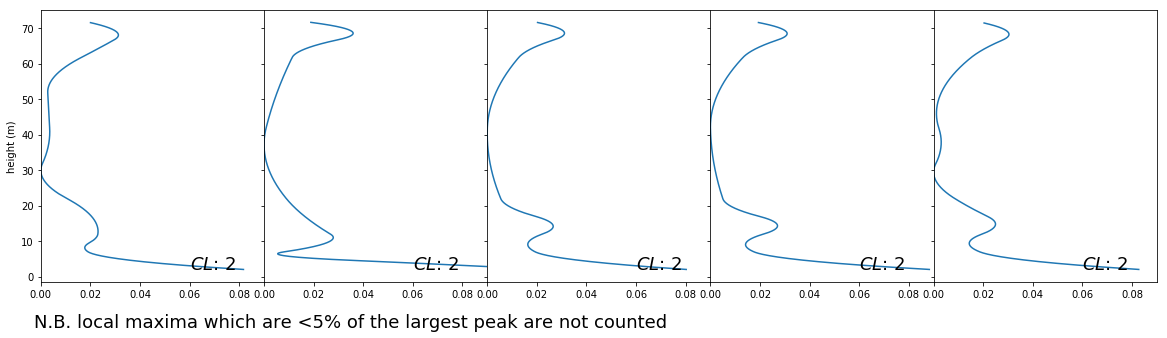

In [56]:
%autoreload 2
# We can take a closer look at individual iterations to see how 
# the CHP configuration changes

f, a = plt.subplots(1, 5, figsize=(20, 5), sharey=True, sharex=True)
las = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), "WC1.las")).CHP("model")

for bsi in xrange(5):
    ax = a[bsi]
    zs = las.simulateCloud()
    CHPi = cc.CanopyComplexity().fromLAS(zs).CHP()
    ax.plot(CHPi.fd, CHPi.zx)
    ax.text(0.06, 2, 
            "$CL$: {}".format(CHPi.layerCount),
            fontsize=18)
    if bsi == 0:    
        ax.set_ylabel("height (m)")
    ax.set_xlim(0, 0.09)
        
f.subplots_adjust(hspace=0, wspace=0)
f.text(0.12, 0, "N.B. local maxima which are <5% of the largest peak are not counted", fontsize=18)

In [87]:
# THIS WILL REQUIRE YOUR OWN SET OF .las FILES

# Instead of passing a single .las file the function will also accept a 
# directory, and in this instance will run across multiple CPU's.  
# The default number is 4 CPU;s; this can be changed by passing the 
# argument processes=x
#
# An example of a command if running on a server with multiple CPU's could be:
# bs = cc.bootstrapComplexity(os.getcwd(), N=100, processes=20, verbose=False)

#os.chdir(lasFiles)
lasList = glob.glob(os.path.join(os.getcwd(), 'forestlas', 'las', '*.las'))
bsMulti = cc.bootstrapComplexity(lasList, N=5, processes=4, verbose=True)

for plot in bsMulti.bsCHPmutiple.keys():
    print plot, bsMulti.bsCHPmutiple[plot].mean()

processing: /Users/phil/python/forestlas/forestlas/las/firstReturns.las
firstReturns 2.0


In [ ]:
# THIS HASN"T BEEN TESTED IN A WHILE!

# Finally we can create continous layers from ALS captured over a wider area.
# This can take a while on a desktop computer, so to illustrate the point we 
# make a canopy height and canopy height profile layer from a smaller area.

from forestlas import woodyAttribute as wa

# first create tiles
lasIO.lasIO('LARGE.las', out=os.getcwd(), verbose=True).tiling(25).exportLAS()

# then attribution layer
CH = wa.woodyAttribute(maxProcess=4, verbose=True).canopyComplexity(os.path.join(os.getcwd(), "LARGE_25m_TILES"), N=10)
# Output can be accessed as an numpy array
# Ar = CH.asArray()

# to export as a tiff requires the installation of GDAL
CH.exportTiff(os.path.join(os.getcwd(), "largeTileExample.tif"))

# Height can also be computed in this way using
#height = wa.woodyAttribute(maxProcess=4, verbose=False).canopyHeight(os.path.join(lasFiles, "large_tile", "WC45_SUB_25m_TILES"))
#height.exportTiff(os.path.join(lasFiles, "largeTileHeight.tif"))